# Clase 16: Clustering K-means

En esta notebook vamos a explorar dos métodos de clusterización vistos en la clase teórica. Los métodos de clusterización que veremos corresponden al rama de ML de aprendizaje no supervisado donde la idea principal es encontrar grupos en los datos que sean similares a otros datos del mismo grupo y lo menos similar posible a datos en otros. 

El método es el algoritmo de partición **K-Means** con la idea de segmentar las observaciones del famoso iris dataset

In [34]:
# importamos las librerías usuales de python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import KMeans                    # K-means
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquicofrom sklearn import preprocessing
from sklearn import preprocessing

In [5]:
# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador

## [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

El método de clusterización "K-Means" busca encontrar *k* clusters de modo tal que se minimice la varianza intra-cluster medida, usualmente, como el cuadrado de la distancia euclídea. Para ello el algoritmo:
1) Empieza encontrando *k centroids* y le asigna a cada sample la etiqueta correspondiente a la del centroid más cercano. 

2) Una vez actualizadas las etiquetas de todas las samples, calcula la posición de los k centroids (como el promedio de las features de las samples de cada cluster). 

3) Vuelve a asignar etiquetas a cada sample de acuerdo a la distancia al centroid más cercano. 

4) Realiza el paso 2 y 3 hasta que no haya más cambios de etiqueta.

In [7]:
from sklearn.datasets import load_iris
data = load_iris()
species = [data['target_names'][x] for x in data['target']]
df = pd.DataFrame(np.column_stack([data['data']]), columns=data['feature_names'])

In [8]:
print('Dimensión del dataset: {}'.format(df.shape))
# Inspección de los primeros datos
df.head(3)

Dimensión del dataset: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
# Construcción de la matriz de features
X = df.to_numpy()

In [10]:
# Normalizamos las features
scaler_X = preprocessing.StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

In [11]:
# probar otros números para k
# Creación del modelo KMeans con k = 5
random_state = 7
kmeans = KMeans(n_clusters=5, random_state=random_state)

# Ajuste del modelo a los datos reducidos en componentes principales
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=7)

Para acceder a las etiquetas que le asignó el modelo a cada sample usamos 'kmeans.labels_'

In [12]:
# Nos fijamos las etiquetas asignadas a las primeras 10 muestras y los counts que recibió cada una
np.unique(kmeans.labels_[:10], return_counts=True) 

(array([2, 4]), array([4, 6], dtype=int64))

Idealmente queríamos tener una sola etiqueta en las primeras 10 muestras ya que corresponden a las fotos tomadas a una dada persona. Sin embargo obtuvimos 6 etiquetas distintas. 

Veamos qué es lo que está pasando. Vamos a plotear el dataset en el espacio de las primeras dos componentes principales pero además vamos a asignarle un color a cada sample que corresponde a la etiqueta asignada por el modelo. También vamos a graficar con una "X" el centroid de cada cluster.

Para acceder a la posición de los centroids en el espacio de 100 PCs usamos 'kmeans.cluster_centers_'

In [13]:
# Guardo las posiciones de los centroids
centroids = kmeans.cluster_centers_
# Printeo las dimensiones de las posiciones
print("Shape de los centroids:",centroids.shape)
print(centroids)

Shape de los centroids: (5, 4)
[[-3.64080601e-01 -1.41450432e+00  1.07774588e-01  8.77547895e-04]
 [ 3.57041325e-01 -3.94403793e-01  5.86562246e-01  5.48467435e-01]
 [-7.49221332e-01  1.43007001e+00 -1.29759846e+00 -1.22142131e+00]
 [ 1.39733017e+00  2.33160219e-01  1.16062026e+00  1.21734049e+00]
 [-1.35230687e+00  1.19144266e-01 -1.31439133e+00 -1.29749445e+00]]


No handles with labels found to put in legend.


Text(0, 0.5, 'sepal width (cm)')

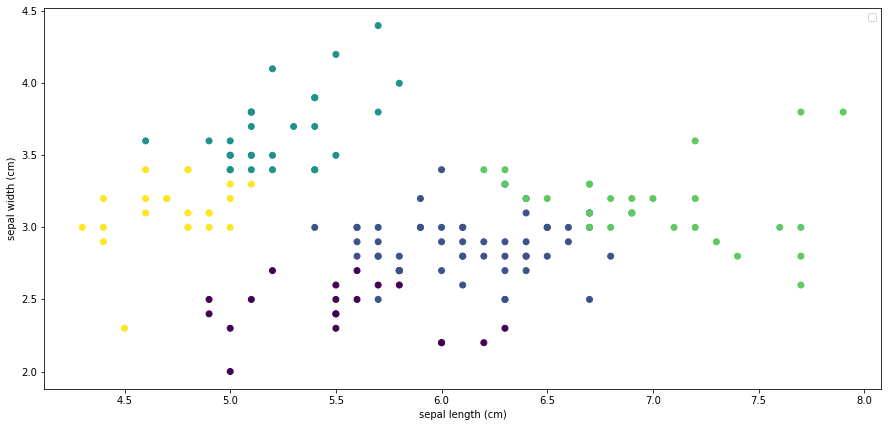

In [14]:
# Este bloque es similar al anterior pero agregando color a cada sample en el scatter plot según la etiqueta asignada

fig, ax = plt.subplots(figsize = (15, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(df['sepal length (cm)'].to_numpy(), df['sepal width (cm)'].to_numpy(), c=kmeans.labels_)
ax.legend()
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

Vemos que varios de los clusters (ej: 11) sí corresponden a las fotos de una persona. Además en casi todos se puede entender por qué el método esta agrupando las fotos (ej: 9, se ven dientes en la sonrisa)

### Elección del número de clusters *k*

No hay un consenso en cómo elegir el parámetro *k* para el método KMeans. En algunos casos tenemos una idea de en cuántos grupos deberían estar divididos nuestros datos y simplemente elegimos ese número. Pero en muchos otros casos esta información no la tenemos al momento de hacer el clustering.

En esta parte vamos a ver dos approachs para la elección de k:
1. Método del codo
2. Coeficiente de Silhouette

#### 1 [Método del codo](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.)

Se hace un grafico de la función objetivo en función de la elección de k y se elige el k correspondiente al punto donde agregar un cluster más no baja significativamente el valor que queremos minimizar. Esto se puede detectar a ojo o utilizando algún paquete de python como ['kneed'](https://raghavan.usc.edu//papers/kneedle-simplex11.pdf)

In [ ]:
from kneed import KneeLocator # importamos el paquete para detectar el codo

In [19]:
sse = [] # acá vamos a guardar el puntaje de la función objetivo

for k in range(1, 40):
  print(k)
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(X_scaled)
  sse.append(kkmeans.inertia_)

1


C:\ProgramData\Anaconda3\envs\coder_house\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


Vamos a graficar SEE en función del número de clusters k

Text(0, 0.5, 'SSE')

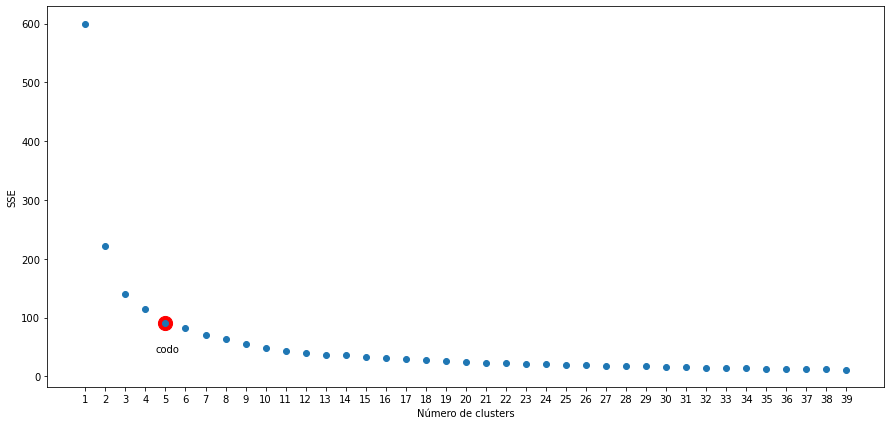

In [26]:
fig, ax = plt.subplots(figsize = (15, 7))

# esta dos lineas las agrego para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(5, sse[4], color='red', s=200) # agregamos un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(4.5, sse[4]-50, s="codo")       # agregamos un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SSEvsK
ax.scatter(range(1, 40), sse)            
ax.set_xticks(range(1, 40))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

En este plot podemos ver dos cosas:
1. SSE es monótonamente decreciente: al agregar un cluster la distancia entre todas las samples a los centroides siempre va a reducirse
2. A ojo distinguimos un codo entre k=4 y k=8 porque al agregar más clusters aumentamos la complejidad del modelo pero SEE disminuye en menor proporción

Usamos la función 'KneeLocator' para detectar el codo. Para ello le tenemos que pasar los valores de K, SEE, la forma de la fución (cóncava o convexa) y la dirección (creciente o decreciente)

In [24]:
kl = KneeLocator(range(1, 40), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)

El codo está en k = 5


No handles with labels found to put in legend.


Text(0, 0.5, 'sepal width (cm)')

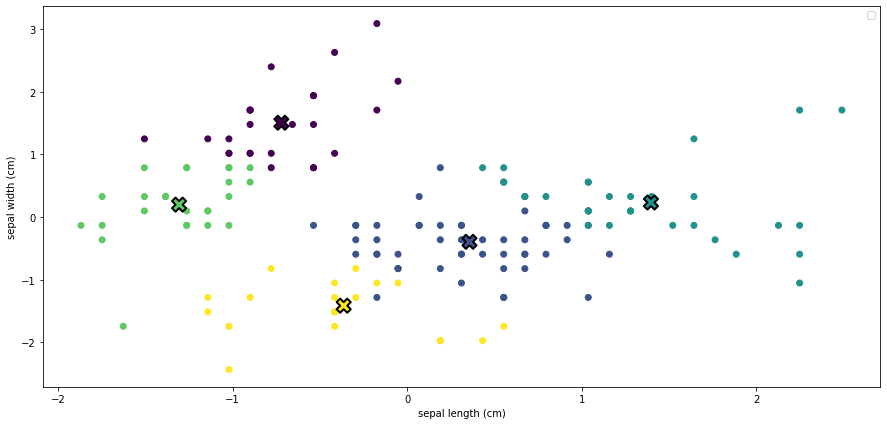

In [28]:
# Creación del modelo KMeans con k = 8
kmeans5 = KMeans(n_clusters=5)

# Ajuste del modelo a los datos reducidos en componentes principales
kmeans5.fit(X_scaled)

# Guardamos la posición de los centroids
centroids5 = kmeans5.cluster_centers_

# Plot
fig, ax = plt.subplots(figsize = (15, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans5.labels_)
ax.scatter(centroids5[:, 0], centroids5[:, 1], marker="X", s=200, linewidths=2,
            c=np.unique(kmeans5.labels_),edgecolors='black')
ax.legend()
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

#### 2 Coeficiente de Silhouette

El coeficiente de Silhouette mide qué tan cerca está una muestra a las otras muestras de su cluster y qué tan lejos está con respecto a las muestras del cluster más cercano. Este coeficiente toma valores de [-1,1], -1 sería si los clusters están superpuestos y 1 que no se tocan.

El coeficiente de Silhouette de cada sample la podemos obtener con la clase 'silhouette_samples' de sklearn.metrics

El puntaje de Silhouette es el promedio de los coeficientes de Silhouette de todas las samples y se computa con la clase 'silhouette_score' de sklearn.metrics. Hay que pasarle a la función los datos y sus etiquetas.

In [29]:
# importamos el puntaje de silhouette
from sklearn.metrics import silhouette_score

In [30]:
# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de k
silhouette_coefficients = []

# Se necesita tener al menos 2 clusters y a los sumo N-1 (con N el numero de muestras) para obtener coeficientes de Silohuette
for k in range(2, 20):
     kkkmeans = KMeans(n_clusters=k)
     kkkmeans.fit(X_scaled)
     score = silhouette_score(X_scaled, kkkmeans.labels_)
     silhouette_coefficients.append(score)

Graficamos el puntaje de Silhouette en función de k

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

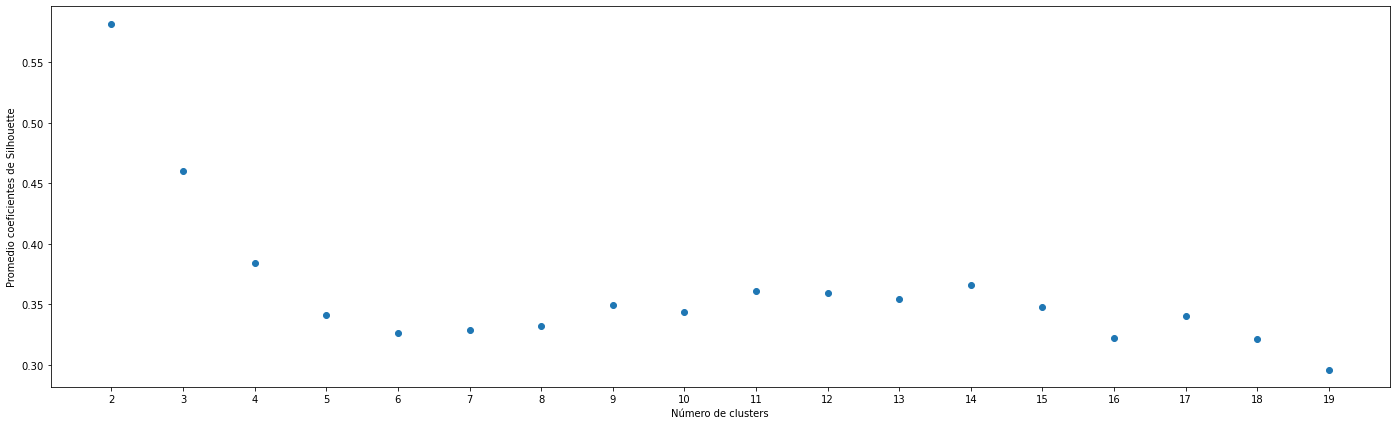

In [31]:
fig, ax = plt.subplots(figsize = (24, 7))

# estas lineas son el grafico de SSEvsK
ax.scatter(range(2, 20), silhouette_coefficients)            
ax.set_xticks(range(2, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")